<a href="https://colab.research.google.com/github/Mithra-610/DBMS-SQL-Codes/blob/main/AI_responsible_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy
!pip install -U spacy-legacy
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import spacy
from transformers import pipeline

# Load pre-trained spaCy model with larger pipeline for better feature extraction
nlp = spacy.load("en_core_web_trf")

# Larger example dataset
data = pd.read_csv("rules.csv")
df = pd.DataFrame(data)

# Preprocessing function using spaCy
def preprocess(text):
    doc = nlp(text)
    # Lemmatize tokens and filter out stopwords and punctuation
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the dataset
df['Preprocessed Query'] = df['User Query'].apply(preprocess)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Preprocessed Query'])
y = df['Responsible Use']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Testing accuracy: {test_accuracy:.2f}")
# Continuous loop to get user queries and generate alerts
while True:
    user_query = input("Enter your query (type 'exit' to quit): ")
    if user_query.lower() == 'exit':
        break

    # Preprocess user query
    preprocessed_query = preprocess(user_query)

    # Transform preprocessed query using TF-IDF vectorizer
    preprocessed_query_vectorized = tfidf_vectorizer.transform([preprocessed_query])

    # Make prediction using the trained model
    prediction = model.predict(preprocessed_query_vectorized)

    # Check if the query is found in the dataset
    if any(df['Preprocessed Query'] == preprocessed_query):
        if prediction[0] == 0:
            print("Alert: Irresponsible use detected.")
        else:
            text_generator = pipeline("text-generation", model="gpt2")
            generated_text = text_generator(user_query, max_length=50, num_return_sequences=1)
            print("Generated Text:", generated_text[0]['generated_text'].strip())
    else:
        # Use Hugging Face's pipeline for text generation (no cost)
        text_generator = pipeline("text-generation", model="gpt2")
        generated_text = text_generator(user_query, max_length=50, num_return_sequences=1)
        print("Generated Text:", generated_text[0]['generated_text'].strip())





Training accuracy: 1.00
Testing accuracy: 1.00
Enter your query (type 'exit' to quit): exit


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import spacy
from transformers import pipeline
import random

# Load pre-trained spaCy model with larger pipeline for better feature extraction
nlp = spacy.load("en_core_web_trf")

# Larger example dataset
data = pd.read_csv("rules.csv")
df = pd.DataFrame(data)

# Preprocessing function using spaCy
def preprocess(text):
    doc = nlp(text)
    # Lemmatize tokens and filter out stopwords and punctuation
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the dataset
df['Preprocessed Query'] = df['User Query'].apply(preprocess)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Preprocessed Query'])
y = df['Responsible Use']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Testing accuracy: {test_accuracy:.2f}")

# Continuous loop to get user queries and generate alerts
while True:
    user_query = input("Enter your query (type 'exit' to quit): ")
    if user_query.lower() == 'exit':
        break

    # Preprocess user query
    preprocessed_query = preprocess(user_query)

    # Transform preprocessed query using TF-IDF vectorizer
    preprocessed_query_vectorized = tfidf_vectorizer.transform([preprocessed_query])

    # Make prediction using the trained model
    prediction = model.predict(preprocessed_query_vectorized)

    # Check if the query is found in the dataset
    if any(df['Preprocessed Query'] == preprocessed_query):
        if prediction[0] == 0:
            print("Alert: Irresponsible use detected.")
            # Generate a random risk factor
            random_risk = random.uniform(0, 1)
            print("Random Risk Factor:", random_risk)
        else:
            text_generator = pipeline("text-generation", model="gpt2")
            generated_text = text_generator(user_query, max_length=50, num_return_sequences=1)
            print("Generated Text:", generated_text[0]['generated_text'].strip())
    else:
        # Use Hugging Face's pipeline for text generation (no cost)
        text_generator = pipeline("text-generation", model="gpt2")
        generated_text = text_generator(user_query, max_length=50, num_return_sequences=1)
        print("Generated Text:", generated_text[0]['generated_text'].strip())


Training accuracy: 1.00
Testing accuracy: 1.00
Enter your query (type 'exit' to quit): can you provide sensitive information
Alert: Irresponsible use detected.
Random Risk Factor: 0.14717720272747614
Enter your query (type 'exit' to quit): Mac


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Mac

The following is the video of me watching a game on Xbox Live in the background. You can see the camera angle at the bottom of my browser. If you go to my site, you can also watch these instructions below.
Enter your query (type 'exit' to quit): orange


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: orange's current home to get this show on.

What will an official show look like?

I don't know. All I know is that we'll probably try to come up with an episode sometime in the future. Like, when
Enter your query (type 'exit' to quit): Computer


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Computer is only available on Windows (64-bit), MacOS, Linux, Windows 8 (Mac), and Mac OS X (OS X 10.12 or later) OS X released by Apple on 28-Jun-2012 (Intel).
Enter your query (type 'exit' to quit): exit


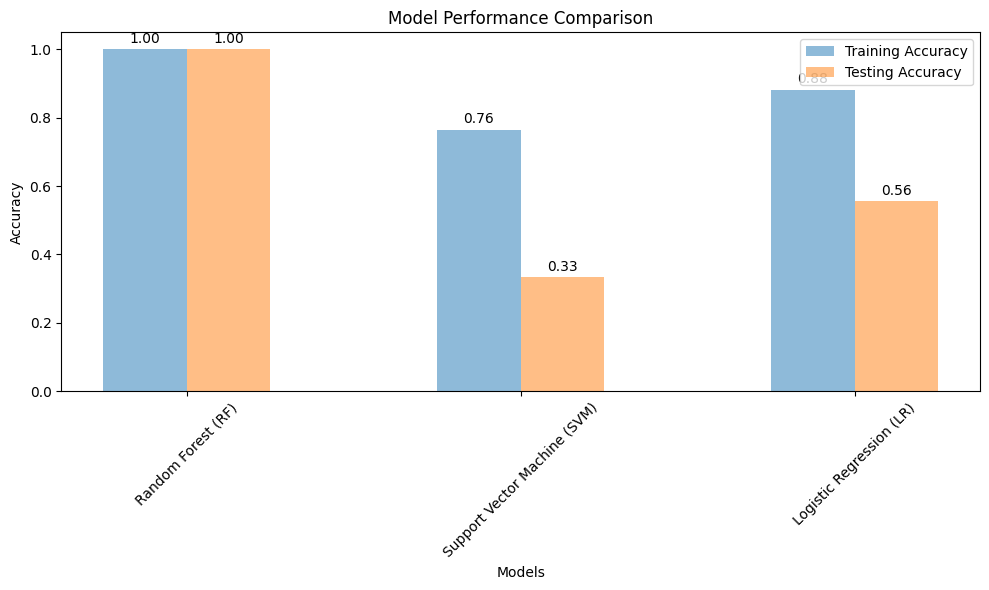

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load pre-trained spaCy model with larger pipeline for better feature extraction
import spacy
nlp = spacy.load("en_core_web_trf")

# Larger example dataset
data = pd.read_csv("rules.csv")
df = pd.DataFrame(data)

# Preprocessing function using spaCy
def preprocess(text):
    doc = nlp(text)
    # Lemmatize tokens and filter out stopwords and punctuation
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the dataset
df['Preprocessed Query'] = df['User Query'].apply(preprocess)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Preprocessed Query'])
y = df['Responsible Use']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# Train Support Vector Machine (SVM) with different hyperparameters
svm_model = SVC(C=0.1, kernel='rbf', gamma='scale', random_state=42)  # Adjusted SVM
svm_model.fit(X_train, y_train)
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_train_accuracy = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# Plotting
models = ['Random Forest (RF)', 'Support Vector Machine (SVM)', 'Logistic Regression (LR)']
train_accuracies = [rf_train_accuracy, svm_train_accuracy, lr_train_accuracy]
test_accuracies = [rf_test_accuracy, svm_test_accuracy, lr_test_accuracy]

plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(models))
plt.bar(index, train_accuracies, bar_width, alpha=0.5, label='Training Accuracy')
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, alpha=0.5, label='Testing Accuracy')

# Annotating accuracy values
for i in index:
    plt.text(i, train_accuracies[i] + 0.01, f"{train_accuracies[i]:.2f}", ha='center', va='bottom')
    plt.text(i + bar_width, test_accuracies[i] + 0.01, f"{test_accuracies[i]:.2f}", ha='center', va='bottom')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


